Scatter Plots
A scatter plot displays the relation between two numerical variables. You saw an example of a scatter plot in an early section where we looked at the number of periods and number of characters in two classic novels.

The Table method scatter draws a scatter plot consisting of one point for each row of the table. Its first argument is the label of the column to be plotted on the horizontal axis, and its second argument is the label of the column on the vertica

In [3]:
# HIDDEN
from datascience import *
import matplotlib
path_data = '../../data/'
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)
from datascience import *
import numpy as np
path_data = '../../../../data/'
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [4]:
data = "http://www.sharecsv.com/dl/f225dad4c697923ef36f4569c8eed1b7/links.csv"
#this link should download the file for you
movies = Table.read_table(data)
movies

movieId,imdbId,tmdbId
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862
6,113277,949
7,114319,11860
8,112302,45325
9,114576,9091
10,113189,710


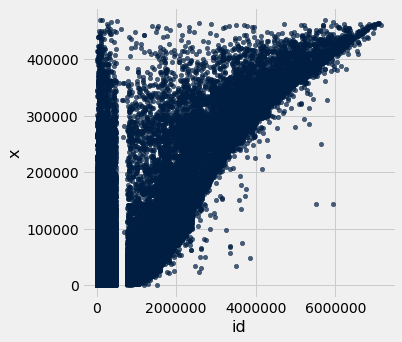

In [5]:
movies = movies.relabeled('imdbId', 'id').relabeled('tmdbId',"x")
movies.scatter('id', 'x')

In [19]:
#LOADING THE DATA
actors_data = "https://raw.githubusercontent.com/data-8/tutor/master/Week4/actors.csv"
actors = Table.read_table(actors_data)
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


# scatterplots

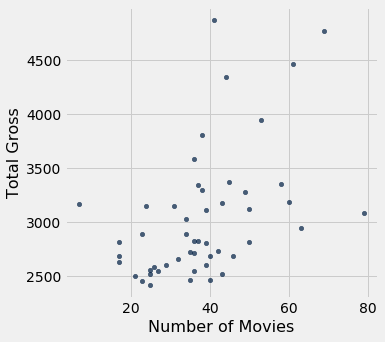

In [20]:
actors.scatter('Number of Movies', 'Total Gross')

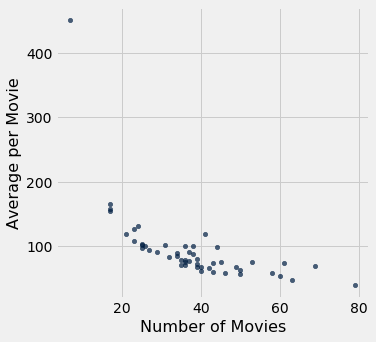

In [21]:
actors.scatter('Number of Movies', 'Average per Movie')

negtaive association
removing the outliers

In [22]:
outliers= actors.where('Number of Movies', are.below(10))
outliers

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [23]:
no_outlier = actors.where('Number of Movies', are.above(10))

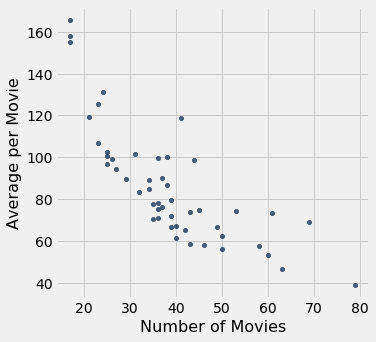

In [24]:
no_outlier.scatter('Number of Movies', 'Average per Movie')


The negative association is still clearly visible. Let’s identify the actors corresponding to the points that lie on the right hand side of the plot where the number of movies is large:



In [25]:
actors.where('Number of Movies', are.above(60))


Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


The great actor Robert DeNiro has the highest number of movies and the lowest average receipt per movie. 

In [18]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


# LINE GRAPHS



In [28]:
data_movies  = "https://raw.githubusercontent.com/data-8/materials-fa17/master/lec/movies_by_year.csv"
movies_by_year = Table.read_table(data_movies)
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


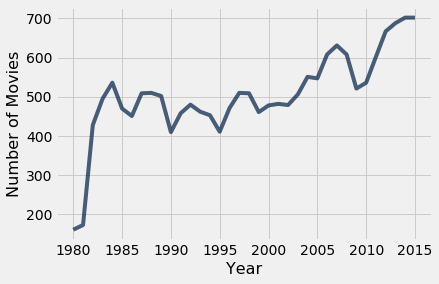

In [29]:
movies_by_year.plot('Year', 'Number of Movies')

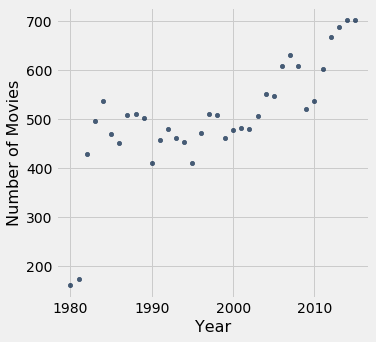

In [32]:
movies_by_year.scatter('Year', 'Number of Movies')

In [33]:
century_21 = movies_by_year.where('Year', are.above(1999))

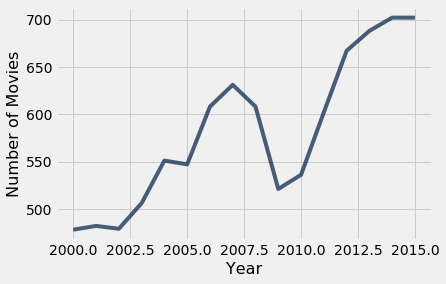

In [34]:
century_21.plot('Year', 'Number of Movies')

The global financial crisis of 2008 has a visible effect – in 2009 there is a sharp drop in the number of movies released.

The dollar figures, however, didn’t suffer much.

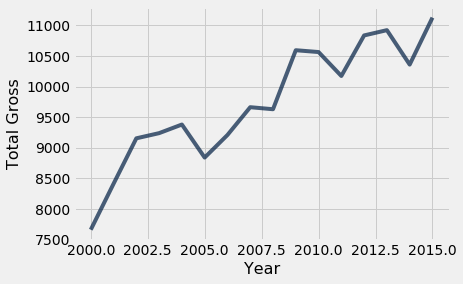

In [35]:
century_21.plot('Year', 'Total Gross')

The total domestic gross receipt was higher in 2009 than in 2008, even though there was a financial crisis and a much smaller number of movies were released.

One reason for this apparent contradiction is that people tend to go to the movies when there is a recession
https://www.nytimes.com/2009/03/01/movies/01films.html?_r=0

In [36]:
century_21.where('Year', are.equal_to(2009))


Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


# Visualizing Categorical Distributions

In [37]:
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


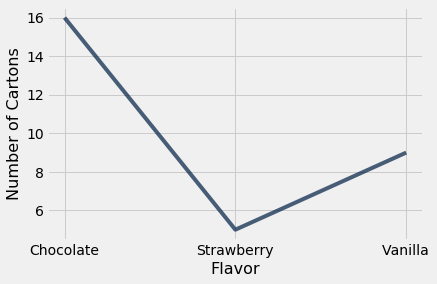

In [40]:
icecream.plot('Flavor','Number of Cartons')

Bar Chart
The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category.

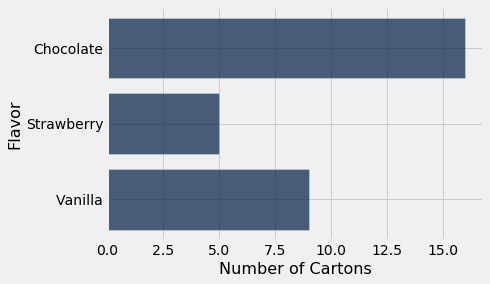

In [41]:
icecream.barh('Flavor', 'Number of Cartons')

If the table consists just of a column of categories and a column of frequencies, as in icecream, the method call is even simpler. You can just specify the column containing the categories, and barh will use the values in the other column as frequencies.



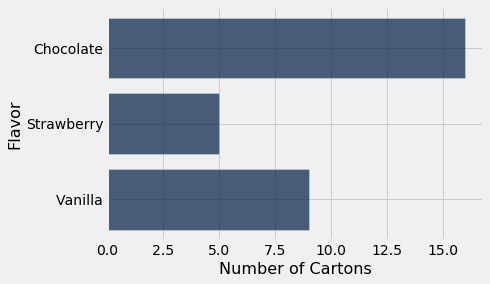

In [42]:
icecream.barh('Flavor')

Numerical vs CATEGORICAL distribution
Those were the scatter plot and the line plot, both of which display two numerical variables – the variables on both axes are numerical. In contrast, the bar chart has categories on one axis and numerical frequencies on the other.

Sorted bat graph bar chart contains exactly the same information as the previous ones, but it is a little easier to read.

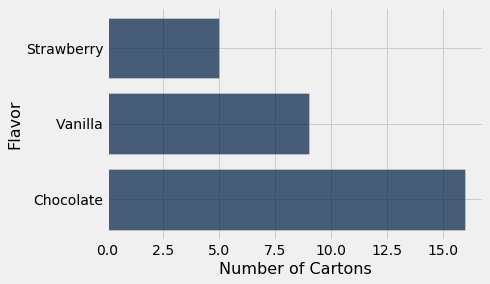

In [44]:
icecream.sort('Number of Cartons', descending=True).barh('Flavor')

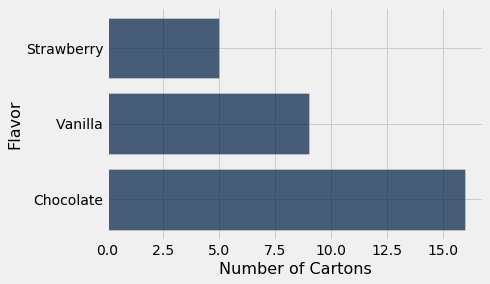

In [45]:
icecream.sort('Number of Cartons', descending=False).barh('Flavor')

In [46]:
dat = "https://raw.githubusercontent.com/data-8/materials-fa17/master/lec/top_movies.csv"
top = Table.read_table(dat)
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [48]:
movies_and_studios = top.select('Title', 'Studio')
movies_and_studios

Title,Studio
Star Wars: The Force Awakens,Buena Vista (Disney)
Avatar,Fox
Titanic,Paramount
Jurassic World,Universal
Marvel's The Avengers,Buena Vista (Disney)
The Dark Knight,Warner Bros.
Star Wars: Episode I - The Phantom Menace,Fox
Star Wars,Fox
Avengers: Age of Ultron,Buena Vista (Disney)
The Dark Knight Rises,Warner Bros.


The Table method GROUP(group) allows us to count how frequently each studio appears in the table, by calling each studio a category and assigning each row to one category. The group method takes as its argument the label of the column that contains the categories, and returns a table of counts of rows in each category. The column of counts is always called count, but you can change that if you like by using relabeled.

In [51]:
studio_distribution = movies_and_studios.group('Studio')
studio_distribution
#Thus group creates a distribution table that shows how the movies are distributed among the categories (studios).

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


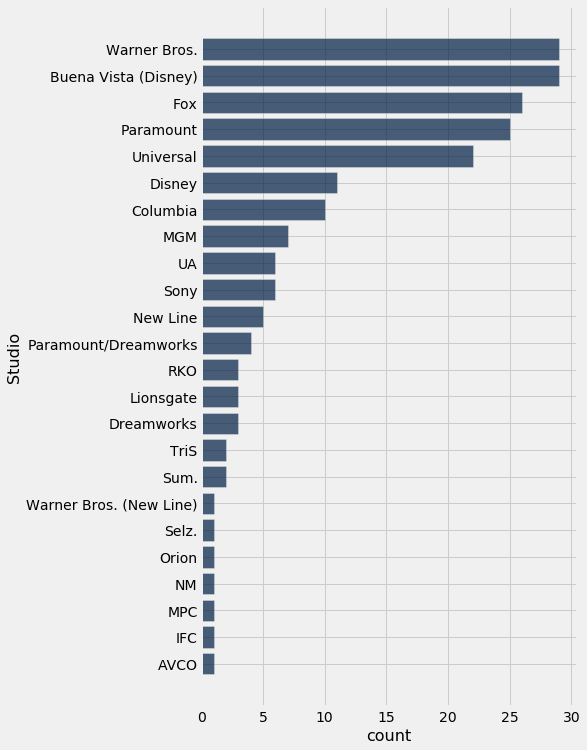

In [57]:
studio_distribution.sort('count', descending=True).barh('Studio')

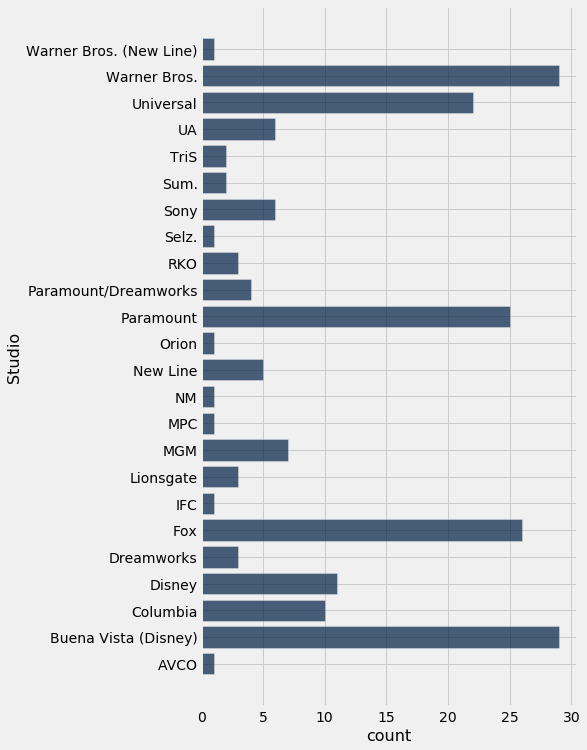

In [56]:

studio_distribution.sort('Studio', descending=True).barh('Studio')

In [59]:
movies_and_years = top.select('Title', 'Year')
movies_and_years

Title,Year
Star Wars: The Force Awakens,2015
Avatar,2009
Titanic,1997
Jurassic World,2015
Marvel's The Avengers,2012
The Dark Knight,2008
Star Wars: Episode I - The Phantom Menace,1999
Star Wars,1977
Avengers: Age of Ultron,2015
The Dark Knight Rises,2012


In [60]:
movies_and_years.group('Year')

Year,count
1921,1
1937,1
1939,1
1940,1
1941,2
1942,1
1945,1
1946,2
1950,1
1952,1


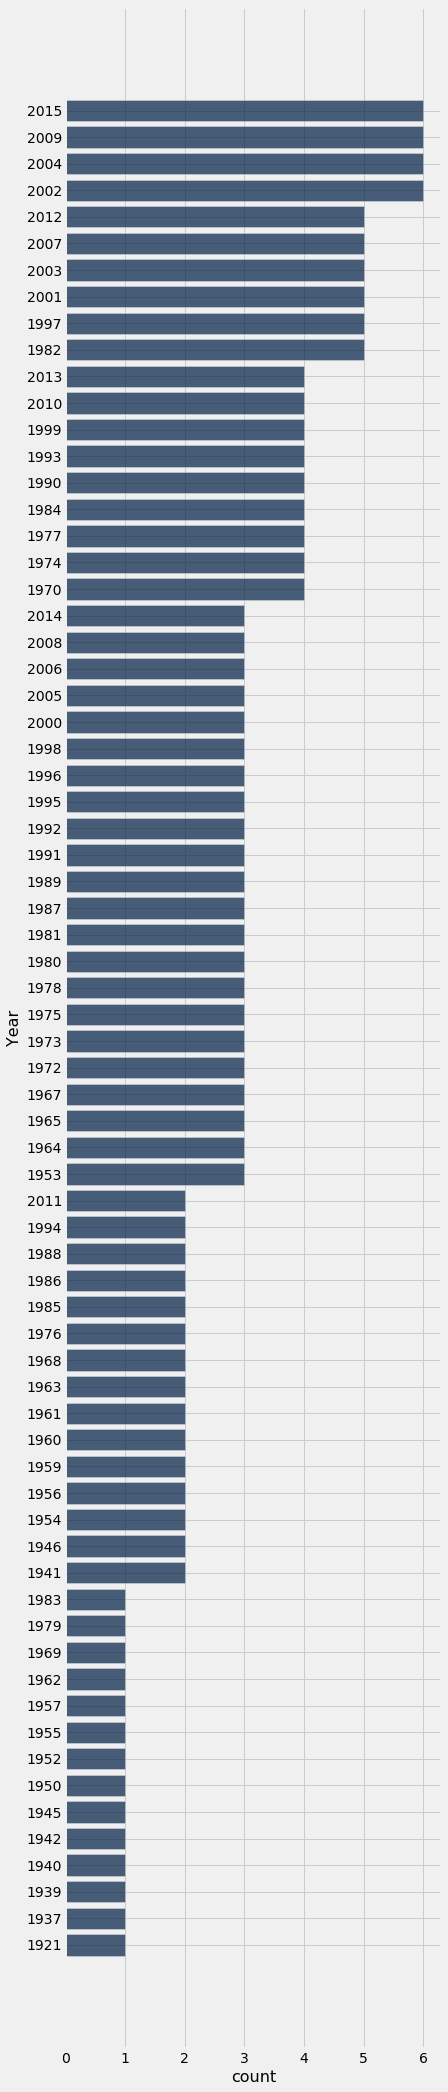

In [61]:
movies_and_years.group('Year').sort('count', descending=True).barh('Year')

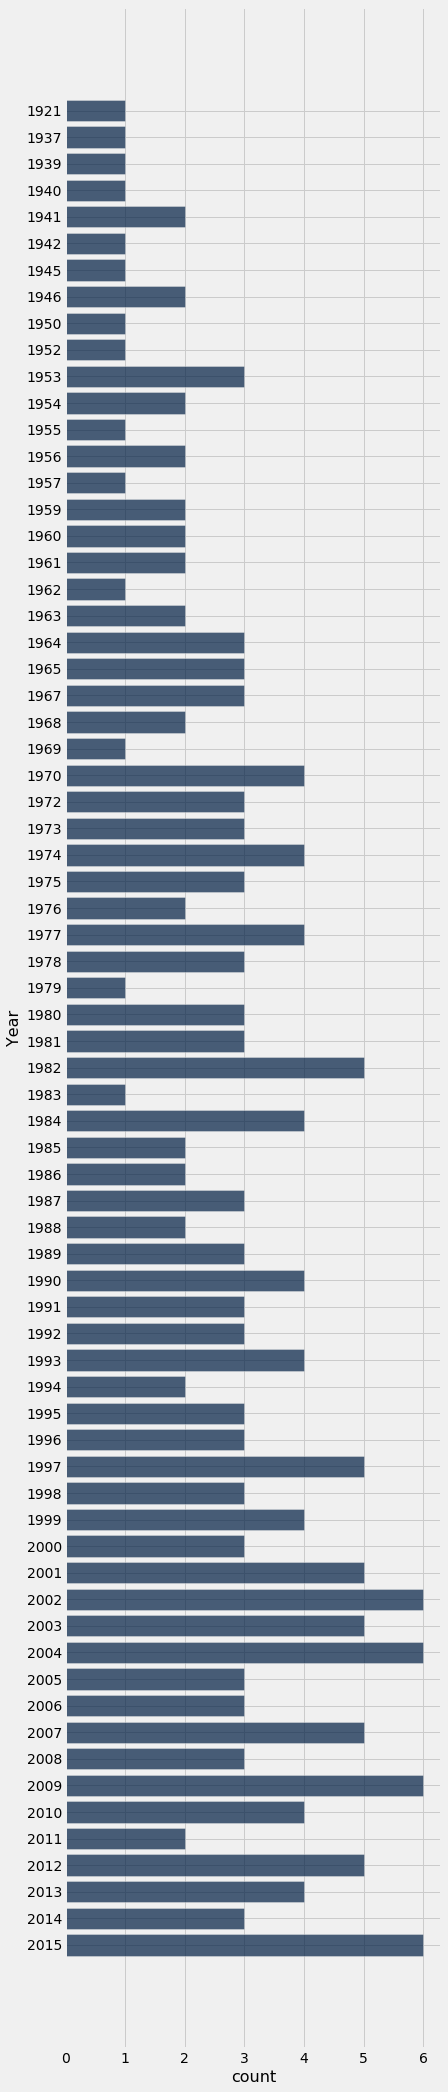

In [62]:

movies_and_years.group('Year').barh('Year')
#By default, barh sorts the categories (years) from lowest to highest. So we will run the code without sorting by count.



Bar charts are intended as visualizations of categorical variables. When the variable is numerical, the numerical relations between its values have to be taken into account when we create visualizations. 

# Visualizing Numerical Distributions

SEX is a categorical variable even though the values have been given a numerical code.

In [67]:
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [68]:
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [73]:
millions = top.select(0).with_column('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Star Wars: The Force Awakens,906.72
Avatar,846.12
Titanic,1178.63
Jurassic World,687.73
Marvel's The Avengers,668.87
The Dark Knight,647.76
Star Wars: Episode I - The Phantom Menace,785.72
Star Wars,1549.64
Avengers: Age of Ultron,465.68
The Dark Knight Rises,500.96


# A Histogram


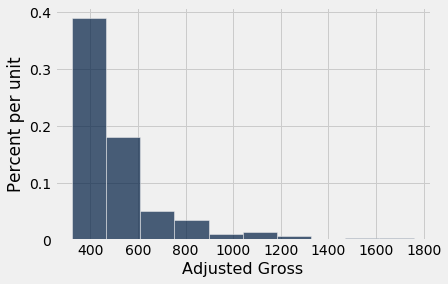

In [76]:
#A histogram of a numerical dataset looks very much like a bar chart, though it has some important differences 
millions.hist('Adjusted Gross')

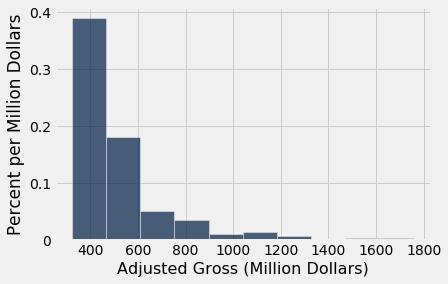

In [77]:
millions.hist('Adjusted Gross', unit="Million Dollars")

The Horizontal Axis
The amounts have been grouped into contiguous intervals called bins. Although in this dataset no movie grossed an amount that is exactly on the edge between two bins, hist does have to account for situations where there might have been values at the edges. So hist has an endpoint convention: bins include the data at their left endpoint, but not the data at their right endpoint.

We will use the notation [a, b) for the bin that starts at a and ends at b but doesn’t include b.

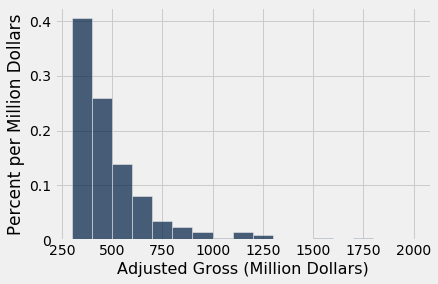

In [78]:
#specifying start point, end point and gap
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

A very small number of movies grossed 800 million dollars or more. This results in the figure being “skewed to the right,” or, less formally, having “a long right hand tail.” 

In [79]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()
#The first column lists the left endpoints of the bins (but see the note about the final value, below). 
#The second column contains the counts of all values in the Adjusted Gross column that are in the corresponding bin

bin,Adjusted Gross count
300,81
400,52
500,28
600,16
700,7
800,5
900,3
1000,1
1100,3
1200,2


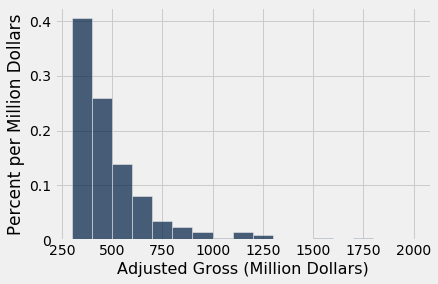

In [80]:
bin_counts.hist('Adjusted Gross count', bin_column='bin', unit='Million Dollars')

In [82]:
counts = bin_counts.relabeled('Adjusted Gross count', 'Count')
counts

bin,Count
300,81
400,52
500,28
600,16
700,7
800,5
900,3
1000,1
1100,3
1200,2


In [83]:
percents = counts.with_column(
    'Percent', (counts.column('Count')/200)*100
    )

In [84]:
percents

bin,Count,Percent
300,81,40.5
400,52,26
500,28,14
600,16,8
700,7,3.5
800,5,2.5
900,3,1.5
1000,1,0.5
1100,3,1.5
1200,2,1


In [85]:
heights = percents.with_column(
    'Height', percents.column('Percent')/100
    )
heights
#The code for calculating the heights used the facts that there are 200 movies in all and that the width of each bin is 100.

bin,Count,Percent,Height
300,81,40.5,0.405
400,52,26,0.26
500,28,14,0.14
600,16,8,0.08
700,7,3.5,0.035
800,5,2.5,0.025
900,3,1.5,0.015
1000,1,0.5,0.005
1100,3,1.5,0.015
1200,2,1,0.01


height of histogram measures crowdedness or density
This method of drawing histograms creates a vertical axis that is said to be on the density scale. The height of bar is not the percent of entries in the bin; it is the percent of entries in the bin relative to the amount of space in the bin. That is why the height measures crowdedness or density

Unequal Bins
An advantage of the histogram over a bar chart is that a histogram can contain bins of unequal width.

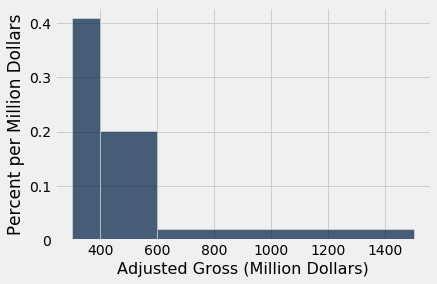

In [86]:
uneven = make_array(300, 400, 600, 1500)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

In [88]:
millions.bin('Adjusted Gross', bins=uneven)
#Although the ranges [300, 400) and [400, 600) have nearly identical counts, the bar over the former is twice as tall as the latter because it is only half as wide. 
#The density of values in the [300, 400) is twice as much as the density in [400, 600).

bin,Adjusted Gross count
300,81
400,80
600,37
1500,0


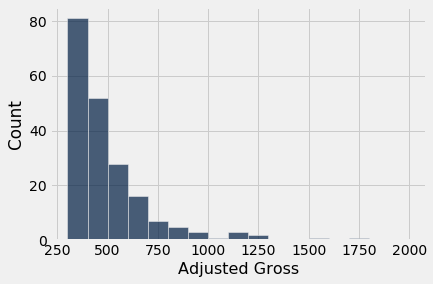

In [89]:
#It is possible to display counts directly in a chart, using the normed=False option of the hist method
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), normed=False)


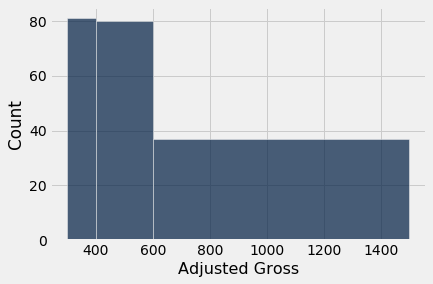

In [90]:
#misleading counts
#While the count scale is perhaps more natural to interpret than the density scale, 
#the chart becomes highly misleading when bins have different widths. 
#Below, it appears (due to the count scale) that high-grossing movies are quite common, 
#when in fact we have seen that they are relatively rare
millions.hist('Adjusted Gross', bins=uneven, normed=False)

Even though the method used is called hist, the figure above is NOT A HISTOGRAM. It misleadingly exaggerates the proportion of movies grossing at least 600 million dollars. The height of each bar is simply plotted at the number of movies in the bin, without accounting for the difference in the widths of the bins.



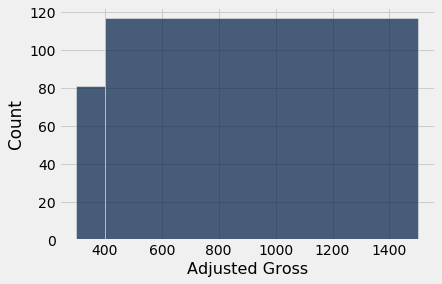

In [92]:
very_uneven = make_array(300, 400, 1500)
millions.hist('Adjusted Gross', bins=very_uneven, normed=False)



That is why a histogram has two defining properties:

1. The bins are drawn to scale and are contiguous (though some might be empty), because the values on the horizontal axis are numerical.
2. The area of each bar is proportional to the number of entries in the bin.

Property 2 is the key to drawing a histogram, and is usually achieved as follows:
area of bar = percent of entries in bin

The calculation of the heights just uses the fact that the bar is a rectangle:
area of bar=height of bar×width of bin
 The units of height are “percent per unit on the horizontal axis.”
 
When drawn using this method,the histogram is said to be drawn on the density scale. On this scale:

1. The area of each bar is equal to the percent of data values that are in the corresponding bin.
2. The total area of all the bars in the histogram is 100%. Speaking in terms of proportions, we say that the areas of all the bars in a histogram “sum to 1”.



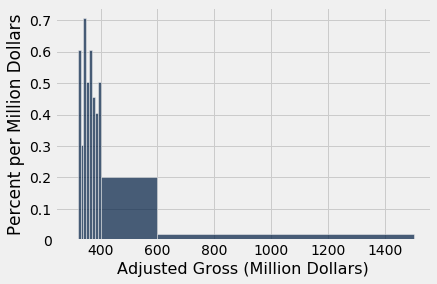

In [93]:
some_tiny_bins = make_array(300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 600, 1500)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million Dollars')

#Notice that because we have the entire dataset that is being used to draw the histograms, we can draw the histograms to as fine a level of detail as the data and our patience will allow. However, if you are looking at a histogram in a book or on a website, and you don’t have access to the underlying dataset, then it becomes important to have a clear understanding of the “rough approximation” created by the flat tops.

HISTOGRAMS ARE TRICKY 
LETS LEARN HISTORGRAM 

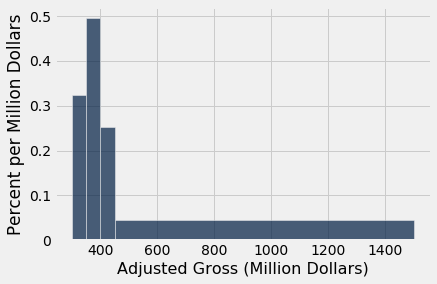

In [95]:
uneven_again = make_array(300, 350, 400, 450, 1500)
millions.hist('Adjusted Gross', bins=uneven_again, unit='Million Dollars')

In [96]:
millions.bin('Adjusted Gross', bins=uneven_again)


bin,Adjusted Gross count
300,32
350,49
400,25
450,92
1500,0


Q: Which has more movies in it?

A: The [450, 1500) bin. It has 92 movies, compared with 25 movies in the [400, 450) bin.

Q: Then why is the [450, 1500) bar so much shorter than the [400, 450) bar?

A: Because height represents density per unit of space in the bin, not the number of movies in the bin. The [450, 1500) bin does have more movies than the [400, 450) bin, but it is also a whole lot wider. So it is less crowded. The density of movies in it is much lower.

# OVERLAID GRAPHS
A common use of such visualizations is to compare two datasets. In this section, we will see how to overlay plots, that is, draw them in a single graphic on a common pair of axes.
To draw overlaid graphs, the methods scatter, plot, and barh can all be called in the same way. For scatter and plot, one column must serve as the common horizontal axis for all the overlaid graphs. For barh, one column must serve as the common axis which is the set of categories. The general call looks like:

name_of_table.method(column_label_of_common_axis, array_of_labels_of_variables_to_plot)

In [97]:
data = "https://raw.githubusercontent.com/flaviovdf/evcomp2018/master/data/galton_subset.csv"
heights = Table.read_table(data)
heights

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


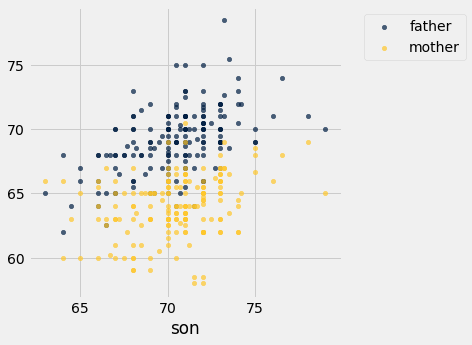

In [99]:
heights.scatter('son')
#Notice how we only specified the variable (sons’ heights) on the common horizontal axis. 
#Python drew two scatter plots: one each for the relation between this variable and the other two.

In [100]:

census_url = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'
full_census_table = Table.read_table(census_url)

In [102]:
# Select columns from the full table and relabel some of them
partial_census_table = full_census_table.select(['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014'])
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')

# Access the rows corresponding to all children, ages 0-18
children = us_pop.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children.show()

AGE,2010,2014
0,3951330,3949775
1,3957888,3949776
2,4090862,3959664
3,4111920,4007079
4,4077551,4005716
5,4064653,4006900
6,4073013,4135930
7,4043046,4155326
8,4025604,4120903
9,4125415,4108349


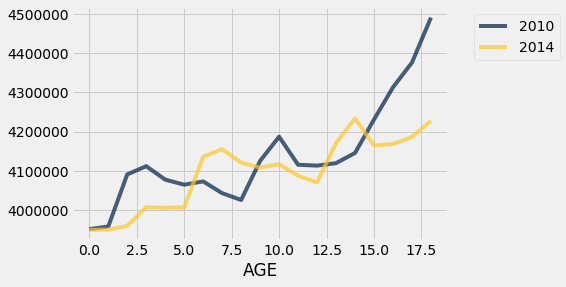

In [103]:
children.plot('AGE')

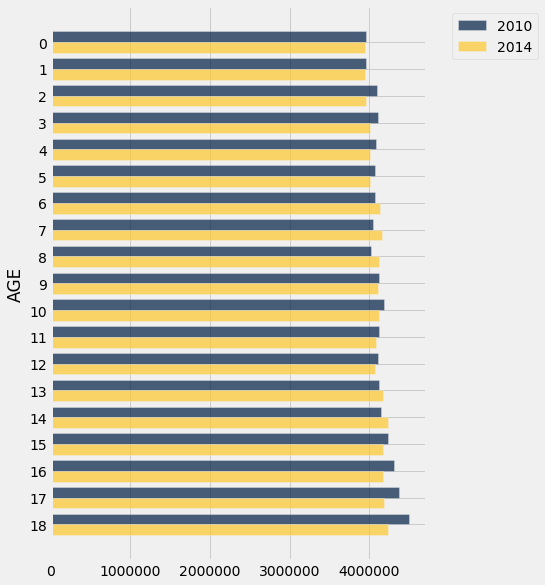

In [108]:
children.barh('AGE')